In [23]:
import pandas as pd
from pandas import read_csv

import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

In [24]:
# Import Matplolib
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = read_csv('EVtripsGTA3.csv',header=0, parse_dates=["Date"])

In [26]:
df.head()

,Date,"Average consumption, electric (kWh/100km)",Distance driven (km),Driving time (min),Average speed (km/h)
0,2016-02-04,41.0,3,11.0,18
1,2016-02-04,54.7,2,8.0,21
2,2016-02-05,32.1,68,119.0,35
3,2016-02-06,37.1,30,70.0,26
4,2016-02-07,44.3,13,32.0,24


In [27]:
names = ["Date", "AvgCons", "Distance", "DriveTime", "AvgSpeed"]
df = read_csv('EVtripsGTA3.csv',header=0, parse_dates=["Date"], names=names)

In [28]:
df.dtypes

Date         datetime64[ns]
AvgCons             float64
Distance              int64
DriveTime           float64
AvgSpeed              int64
dtype: object

In [29]:
df.describe()

,AvgCons,Distance,DriveTime,AvgSpeed
count,469.000000,469.000000,469.000000,469.000000
mean,31.545842,13.153518,25.995736,30.729211
std,8.496448,10.746193,19.457492,10.420293
min,19.300000,1.000000,3.000000,2.000000
25%,25.500000,8.000000,15.000000,24.000000
50%,29.300000,9.000000,19.000000,30.000000
75%,34.900000,14.000000,33.000000,35.000000
max,91.600000,91.000000,226.000000,95.000000


In [30]:
df.count()

Date         469
AvgCons      469
Distance     469
DriveTime    469
AvgSpeed     469
dtype: int64

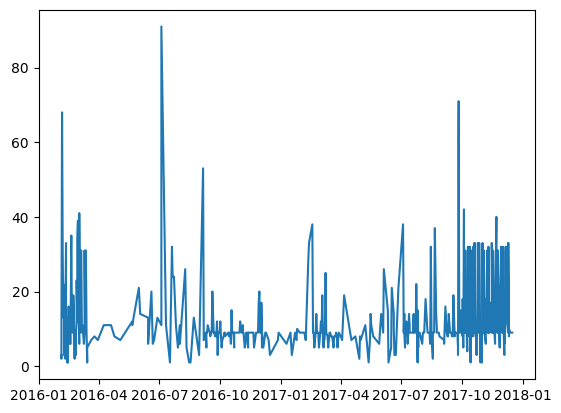

In [31]:
plt.plot(df["Date"], df["Distance"])

array([[<AxesSubplot: title={'center': 'Date'}>,
        <AxesSubplot: title={'center': 'AvgCons'}>],
       [<AxesSubplot: title={'center': 'Distance'}>,
        <AxesSubplot: title={'center': 'DriveTime'}>],
       [<AxesSubplot: title={'center': 'AvgSpeed'}>, <AxesSubplot: >]],
      dtype=object)

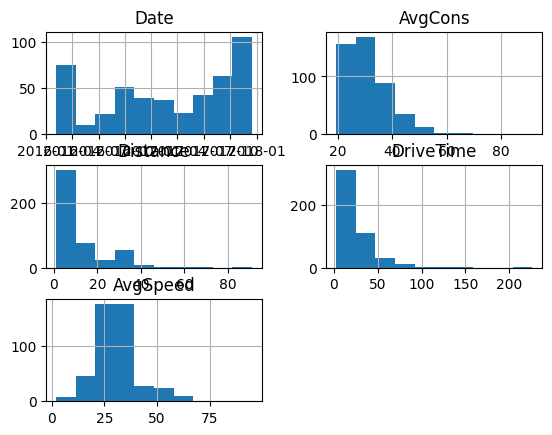

In [32]:
df.hist()

array([[<AxesSubplot: xlabel='AvgCons', ylabel='AvgCons'>,
        <AxesSubplot: xlabel='Distance', ylabel='AvgCons'>,
        <AxesSubplot: xlabel='DriveTime', ylabel='AvgCons'>,
        <AxesSubplot: xlabel='AvgSpeed', ylabel='AvgCons'>],
       [<AxesSubplot: xlabel='AvgCons', ylabel='Distance'>,
        <AxesSubplot: xlabel='Distance', ylabel='Distance'>,
        <AxesSubplot: xlabel='DriveTime', ylabel='Distance'>,
        <AxesSubplot: xlabel='AvgSpeed', ylabel='Distance'>],
       [<AxesSubplot: xlabel='AvgCons', ylabel='DriveTime'>,
        <AxesSubplot: xlabel='Distance', ylabel='DriveTime'>,
        <AxesSubplot: xlabel='DriveTime', ylabel='DriveTime'>,
        <AxesSubplot: xlabel='AvgSpeed', ylabel='DriveTime'>],
       [<AxesSubplot: xlabel='AvgCons', ylabel='AvgSpeed'>,
        <AxesSubplot: xlabel='Distance', ylabel='AvgSpeed'>,
        <AxesSubplot: xlabel='DriveTime', ylabel='AvgSpeed'>,
        <AxesSubplot: xlabel='AvgSpeed', ylabel='AvgSpeed'>]],
      dtype=object)

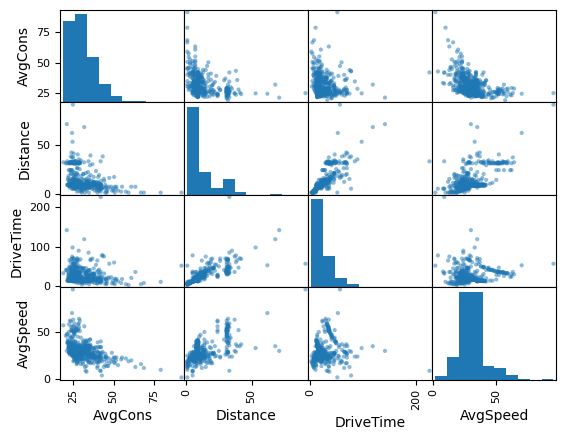

In [33]:
pd.plotting.scatter_matrix(df)

<AxesSubplot: >

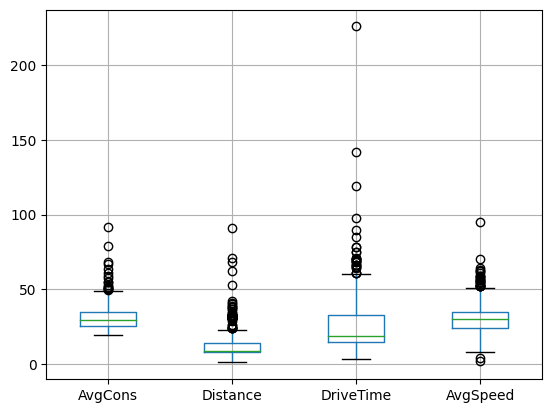

In [34]:
df.boxplot()

In [35]:
df.corr()

C:\Users\15841\AppData\Local\Temp\ipykernel_12940\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,AvgCons,Distance,DriveTime,AvgSpeed
AvgCons,1.000000,-0.313504,-0.079645,-0.482195
Distance,-0.313504,1.000000,0.732478,0.588626
DriveTime,-0.079645,0.732478,1.000000,0.005506
AvgSpeed,-0.482195,0.588626,0.005506,1.000000


C:\Users\15841\AppData\Local\Temp\ipykernel_12940\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

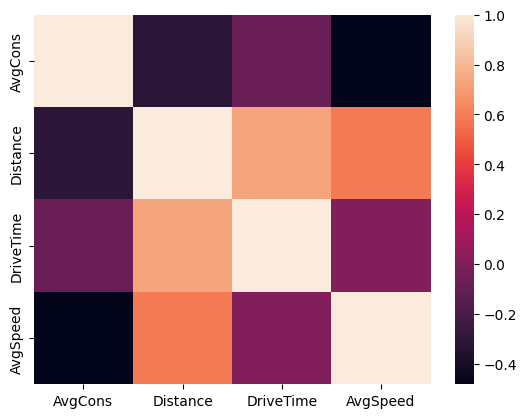

In [36]:
sns.heatmap(df.corr())

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [46]:
# features = predictor/independent/explanatory variables
X = df.drop(columns=['AvgCons', 'Date'])

print(X)
# target variable = dependent/response variable
y = df['AvgCons']
print(y)

     Distance  DriveTime  AvgSpeed
0           3       11.0        18
1           2        8.0        21
2          68      119.0        35
3          30       70.0        26
4          13       32.0        24
..        ...        ...       ...
464         8       24.0        20
465        10       25.0        24
466         9       17.0        31
467         9       16.0        35
468         9       17.0        31

[469 rows x 3 columns]
0      41.0
1      54.7
2      32.1
3      37.1
4      44.3
       ... 
464    35.5
465    27.2
466    34.7
467    32.4
468    29.8
Name: AvgCons, Length: 469, dtype: float64


In [47]:
# Split off test dataset
# 1/5 of the data will be used for testing
test_size = 0.20
seed = 42
# select 1/5 randomly and split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size=test_size, random_state=seed)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

     Distance  DriveTime  AvgSpeed
414         9       19.0        29
305         9       14.0        38
22          6       11.0        35
307         9       15.0        35
46          6       19.0        19
..        ...        ...       ...
106        13       34.0        24
270        21       48.0        27
348         9       22.0        25
435        31       48.0        40
102        26       64.0        24

[375 rows x 3 columns]
414    29.3
305    21.8
22     35.3
307    22.5
46     39.7
       ... 
106    29.0
270    27.5
348    24.6
435    26.5
102    27.6
Name: AvgCons, Length: 375, dtype: float64
     Distance  DriveTime  AvgSpeed
55          9       19.0        28
73          7       20.0        22
33          6       14.0        26
445         9       18.0        30
425        31       32.0        59
..        ...        ...       ...
443         9       24.0        23
137         8       15.0        35
131         8       17.0        31
398         9       16.0       

In [48]:
# Test options and evaluation metric
num_folds = 10
seed = 42
scoring = 'neg_mean_squared_error'
# evaluate algorithms using the Mean Squared Error (MSE) metric. 
# MSE will give an idea of how wrong all estimates are (0 is perfect).
# The evaluation function assumes the greater the better, therefore, we use the NEGATIVE MSE.

In [49]:
# Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('RIDGE', Ridge()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [50]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    # define how to split off validation data
    kfold = KFold(n_splits=num_folds, shuffle=True, 
    random_state=seed)
    # train the model
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), 
    cv_results.std())
    print(msg)

LR: -63.381278 (28.978327)
LASSO: -60.147341 (28.727248)
RIDGE: -63.374790 (28.974611)
EN: -61.065225 (28.591449)
KNN: -57.520577 (28.452586)
CART: -75.364592 (31.219254)
SVR: -61.972208 (36.963626)


[array([ -37.2617606 ,  -43.99078681,  -28.97061078, -114.22414173,
        -72.42367897,  -81.19326743,  -35.57262839,  -94.95961597,
        -36.15646232,  -89.05983095]), array([ -34.90957784,  -42.32089339,  -30.09785603, -111.76971567,
        -73.08647697,  -47.07266366,  -37.35094821,  -97.85137721,
        -36.78834488,  -90.22555114]), array([ -37.25888795,  -43.98901463,  -28.97131136, -114.22226781,
        -72.42424688,  -81.12763759,  -35.5736247 ,  -94.96216081,
        -36.15685386,  -89.06189906]), array([ -35.66366584,  -42.89696082,  -29.61026456, -112.74036383,
        -72.82492814,  -55.81913668,  -36.78965299,  -97.4461192 ,
        -36.50683655,  -90.35431723]), array([ -28.09321053,  -53.19235789,  -26.68870526, -113.61651579,
        -97.46335789,  -40.29330811,  -33.85872432,  -71.88970811,
        -40.17683243,  -69.93304865]), array([ -41.71084785,  -77.5992152 ,  -39.59231862, -126.89557792,
        -97.83424076,  -49.66936327,  -39.45991366, -119.89745792,


[Text(1, 0, 'LR'),
 Text(2, 0, 'LASSO'),
 Text(3, 0, 'RIDGE'),
 Text(4, 0, 'EN'),
 Text(5, 0, 'KNN'),
 Text(6, 0, 'CART'),
 Text(7, 0, 'SVR')]

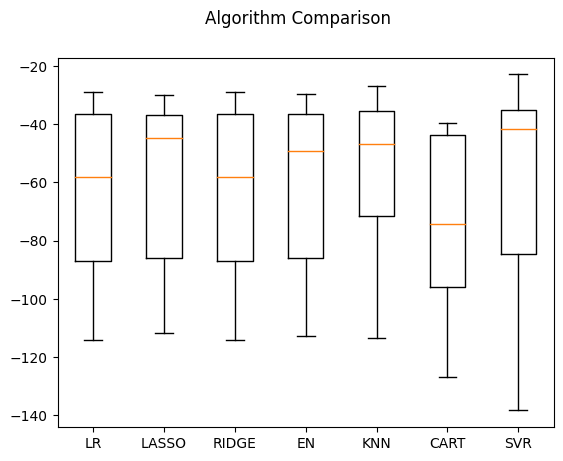

In [51]:
# Compare Algorithms
print(results)
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

In [52]:
# Standardize the dataset first
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', 
StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', 
StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledRIDGE', Pipeline([('Scaler', 
StandardScaler()),('RIDGE', Ridge())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', 
StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', 
StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', 
StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', 
StandardScaler()),('SVR', SVR())])))

In [53]:
# evaluate each model in turn
results = []
names = []
for name, model in pipelines:
    # define how to split off validation data
    kfold = KFold(n_splits=num_folds, shuffle=True, 
    random_state=seed)
    # train the model
    cv_results = cross_val_score(model, X_train, 
    y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), 
    cv_results.std())
    print(msg)

ScaledLR: -63.381278 (28.978327)
ScaledLASSO: -58.977197 (31.290927)
ScaledRIDGE: -62.523073 (28.578002)
ScaledEN: -60.463159 (32.980463)
ScaledKNN: -56.527480 (28.640515)
ScaledCART: -75.577126 (31.703878)
ScaledSVR: -61.986620 (37.429817)


[array([ -37.2617606 ,  -43.99078681,  -28.97061078, -114.22414173,
        -72.42367897,  -81.19326743,  -35.57262839,  -94.95961597,
        -36.15646232,  -89.05983095]), array([ -30.5974071 ,  -40.23137457,  -32.6832383 , -112.08857546,
        -77.82238255,  -29.28485162,  -35.22284018, -104.66578551,
        -39.18278975,  -87.99272316]), array([ -36.9410467 ,  -43.76824521,  -29.07024646, -113.90808197,
        -72.49833835,  -72.54495243,  -35.70763379,  -95.27360707,
        -36.21115697,  -89.30742176]), array([ -27.49342235,  -39.35318069,  -34.30066132, -117.32584179,
        -80.42000698,  -30.91901387,  -36.19776533, -109.21896327,
        -40.68430279,  -88.71843149]), array([ -24.80336842,  -46.86070526,  -25.11575789, -114.37750526,
        -92.86610526,  -35.56275676,  -34.76251892,  -75.10204324,
        -48.24180541,  -67.58223784]), array([ -34.24683469,  -78.97974152,  -41.14021336, -129.86057792,
        -97.82476708,  -47.50780922,  -48.7150488 , -120.128539  ,


[Text(1, 0, 'ScaledLR'),
 Text(2, 0, 'ScaledLASSO'),
 Text(3, 0, 'ScaledRIDGE'),
 Text(4, 0, 'ScaledEN'),
 Text(5, 0, 'ScaledKNN'),
 Text(6, 0, 'ScaledCART'),
 Text(7, 0, 'ScaledSVR')]

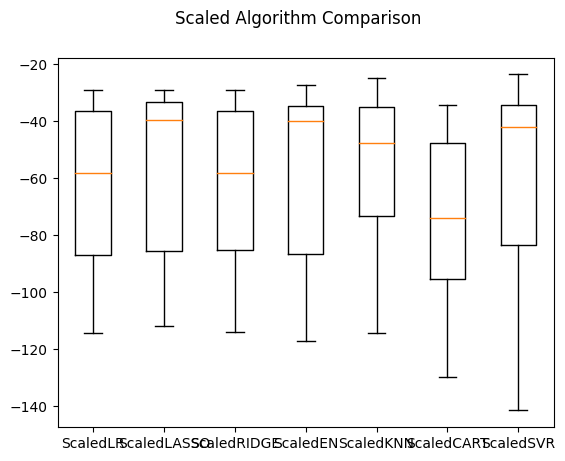

In [54]:
# Compare Algorithms
print(results)
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)